<a href="https://colab.research.google.com/github/Koo82/ML/blob/main/h_25_%E1%84%8F%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A5%E1%84%89%E1%85%B3%E1%84%90%E1%85%A5%E1%84%85%E1%85%B5%E1%86%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 클러스터링

- 거리기반  클러스터링(kMeans), 밀도기반 클러스터링(DBSCAN)
## 데이터
- 전력판매량(시도별/용도별) 액셀 파일

## 코랩에서 한글 폰트 설치

In [1]:
# 코랩을 사용하는 경우만 실행

import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


-  (주의) 여기서 런타임 - 런타임 다시 시작을 실행한 후에 위의 코드를 다시한번 실행하여야 한다

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 한글 설치

In [3]:
import platform, matplotlib
from matplotlib import rc

# '-' 기호 제대로 보이기
matplotlib.rcParams['axes.unicode_minus'] = False

# 윈도우
if platform.system() == 'Windows':
    rc('font', family="Malgun Gothic")
# 맥
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
# 리눅스
if platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')

데이터 읽기
--

In [18]:
power_data = pd.read_excel('https://github.com/StillWork/data/blob/master/power.xls?raw=true')
print(power_data.shape)
power_data[:3]

(19, 28)


,구분,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계,합계
0,강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712,16552816
1,개성,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937,114847859


In [19]:
power_data.columns

Index(['구분', '주거용', '공공용', '서비스업', '업무용합계', '농림어업', '광업', '제조업', '식료품제조',
       '섬유,의류', '목재,나무', '펄프,종이', '출판,인쇄', '석유,화확', '의료,광학', '요업', '1차금속',
       '조립금속', '기타기계', '사무기기', '전기기기', '영상,음향', '자동차', '기타운송', '가구및기타', '재생재료',
       '산업용합계', '합계'],
      dtype='object')

In [20]:
power = power_data.set_index('구분')
power = power.drop(['합계', '개성'])
power = power.drop('합계', axis=1)

In [7]:
power.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주거용     17 non-null     int64
 1   공공용     17 non-null     int64
 2   서비스업    17 non-null     int64
 3   업무용합계   17 non-null     int64
 4   농림어업    17 non-null     int64
 5   광업      17 non-null     int64
 6   제조업     17 non-null     int64
 7   식료품제조   17 non-null     int64
 8   섬유,의류   17 non-null     int64
 9   목재,나무   17 non-null     int64
 10  펄프,종이   17 non-null     int64
 11  출판,인쇄   17 non-null     int64
 12  석유,화확   17 non-null     int64
 13  의료,광학   17 non-null     int64
 14  요업      17 non-null     int64
 15  1차금속    17 non-null     int64
 16  조립금속    17 non-null     int64
 17  기타기계    17 non-null     int64
 18  사무기기    17 non-null     int64
 19  전기기기    17 non-null     int64
 20  영상,음향   17 non-null     int64
 21  자동차     17 non-null     int64
 22  기타운송    17 non-null     int64
 23  가구및기타   17 non-null  

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text major ticklabel objects>)

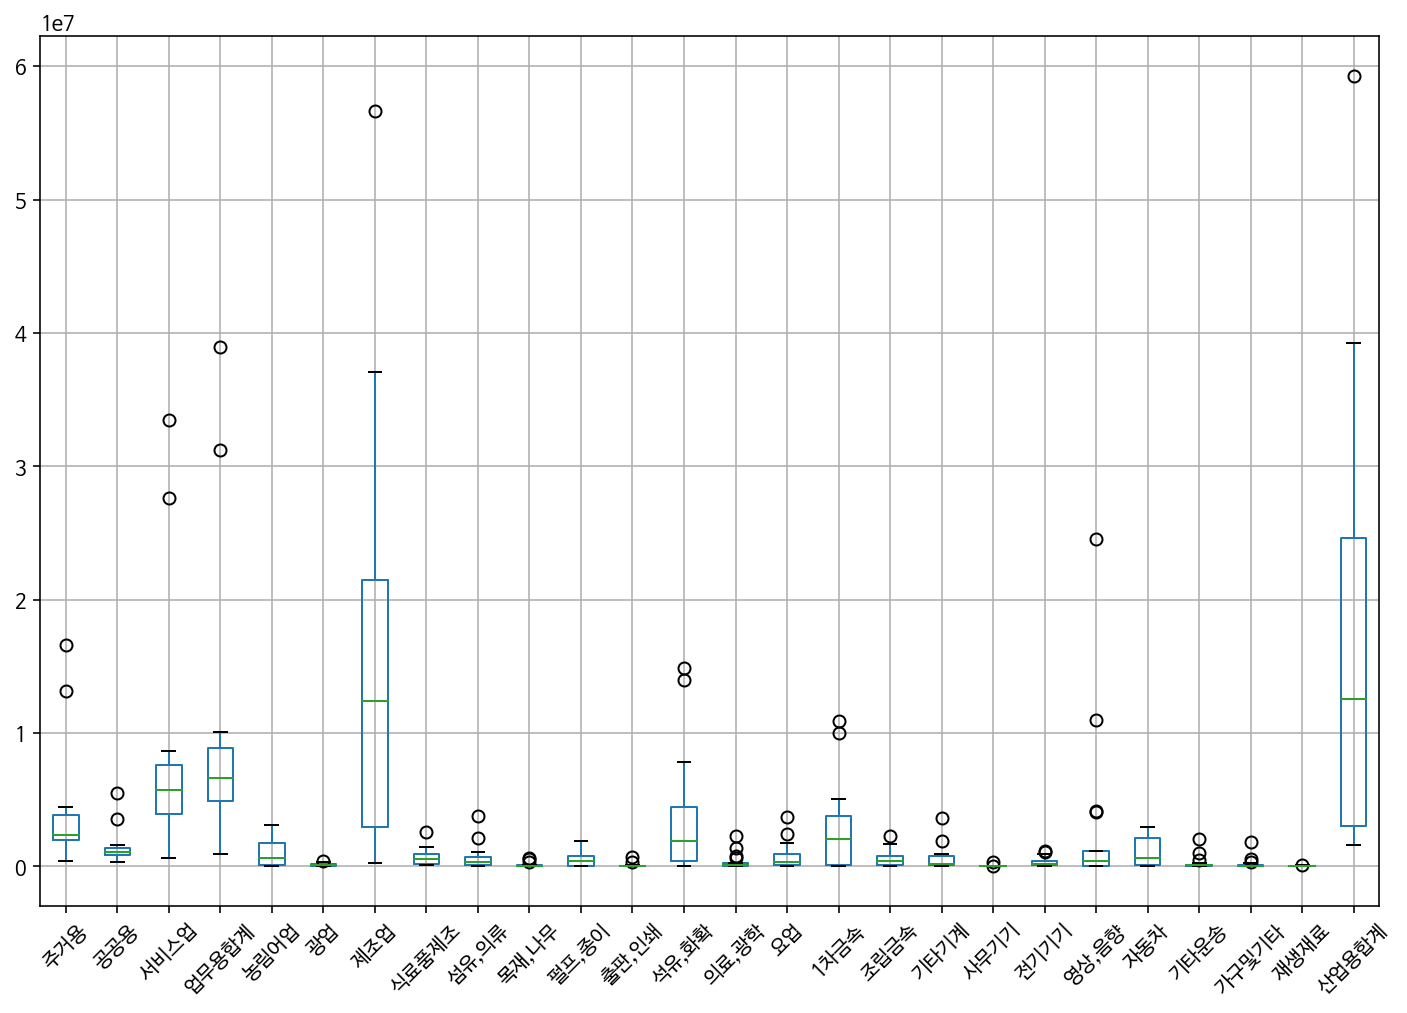

In [21]:
power.boxplot(figsize=(12,8))
plt.xticks(rotation=45)

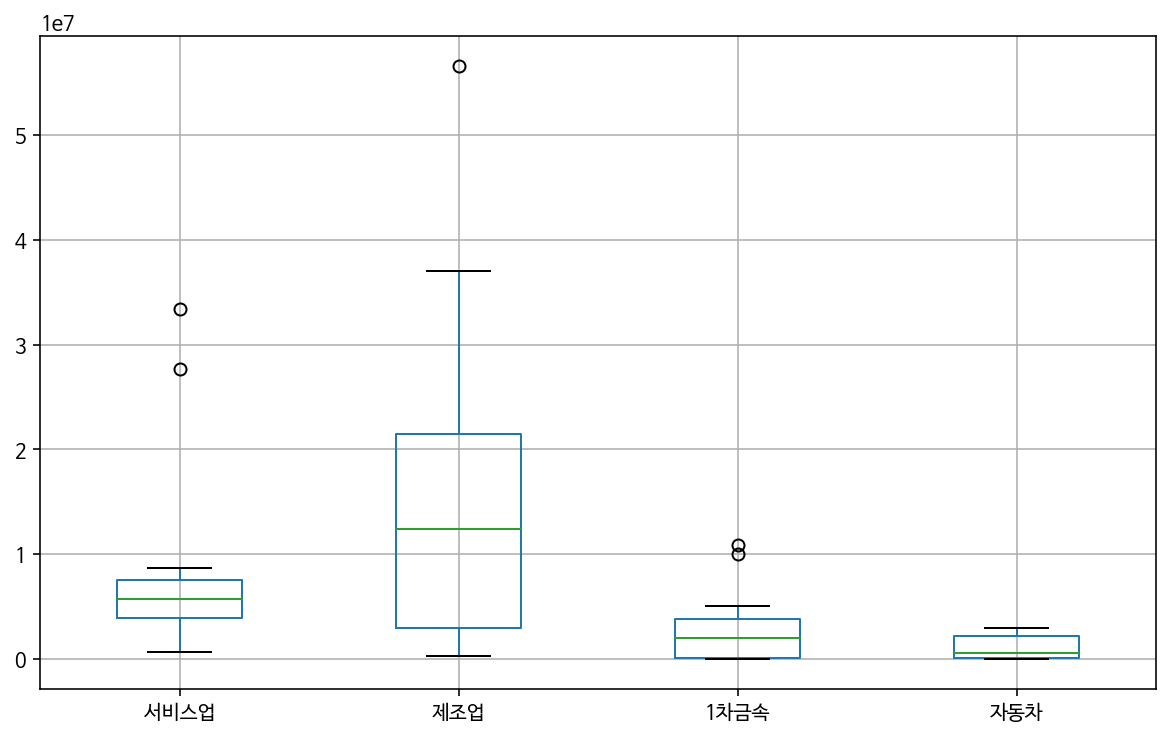

In [9]:
power[['서비스업','제조업', '1차금속', '자동차']].boxplot(figsize=(10,6))

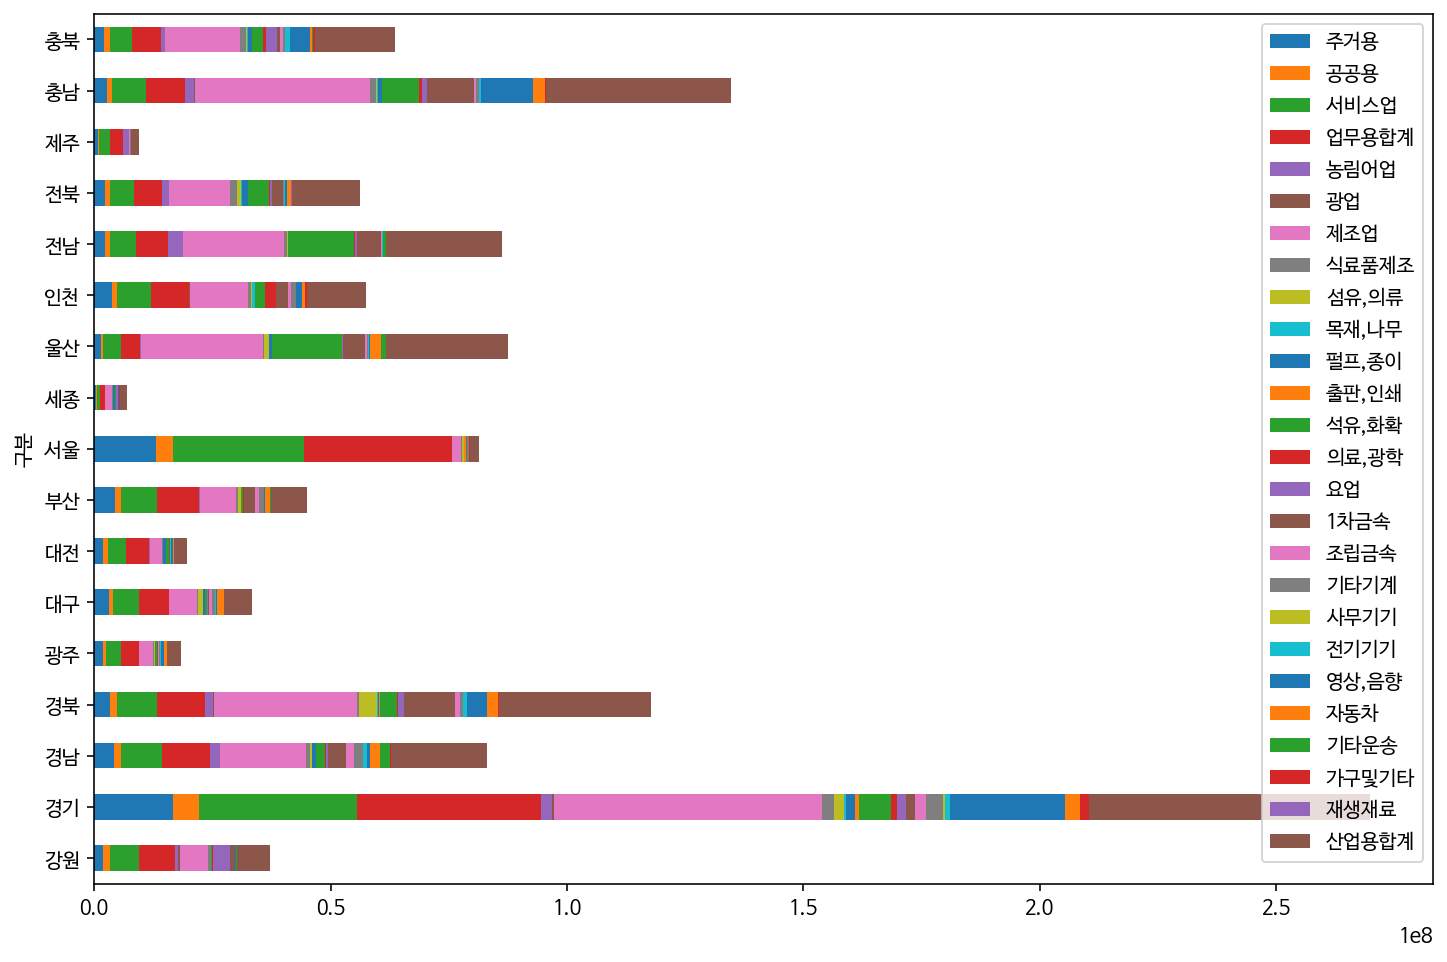

In [10]:
power.plot(kind='barh', figsize=(12,8), stacked=True)

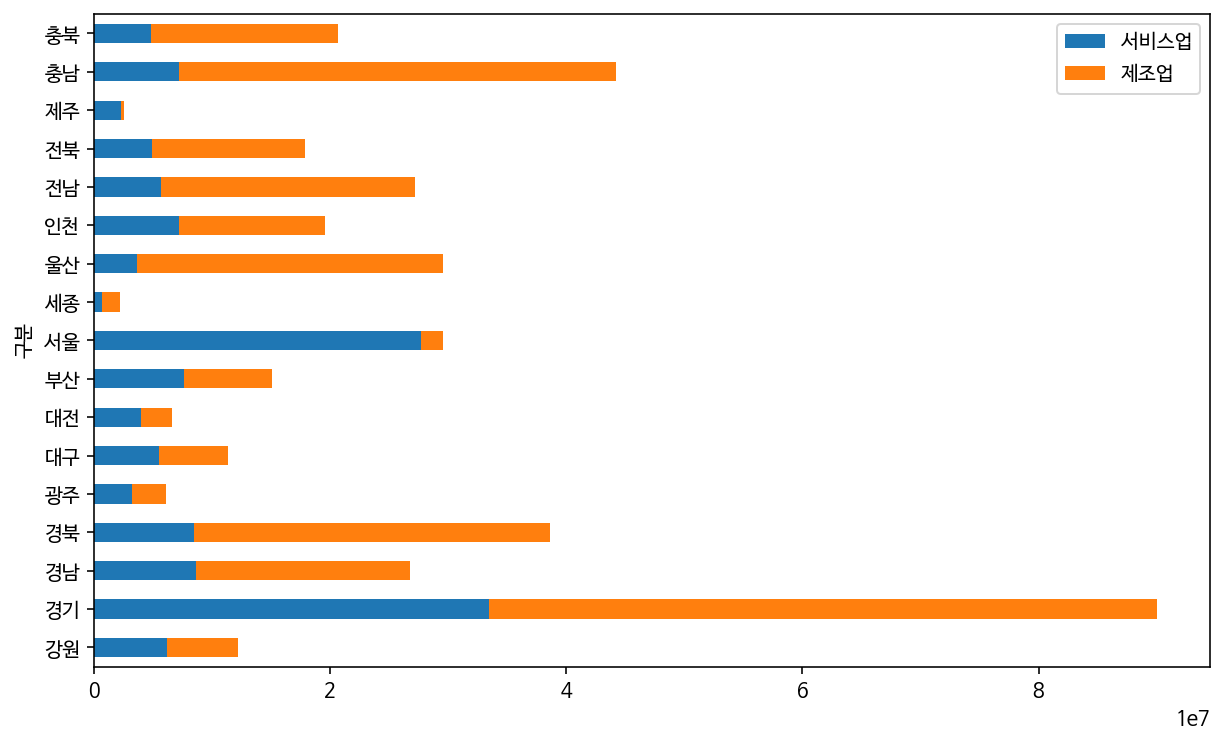

In [11]:
power = power[['서비스업', '제조업']]
power.plot(kind='barh', figsize=(10,6), stacked=True)

In [22]:
power.head(5)

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계
구분,,,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274


데이터 탐색

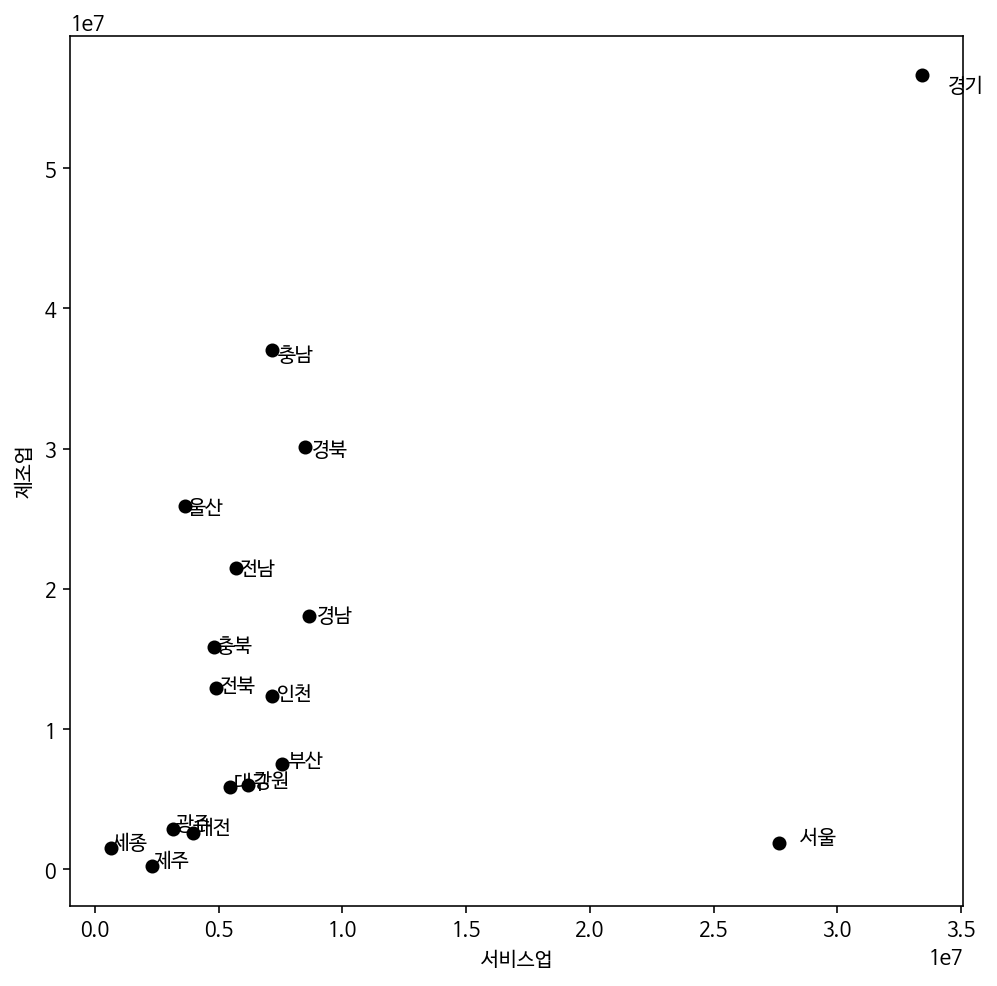

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

### 아웃라이어

In [14]:
power = power.drop(['경기', '서울'])

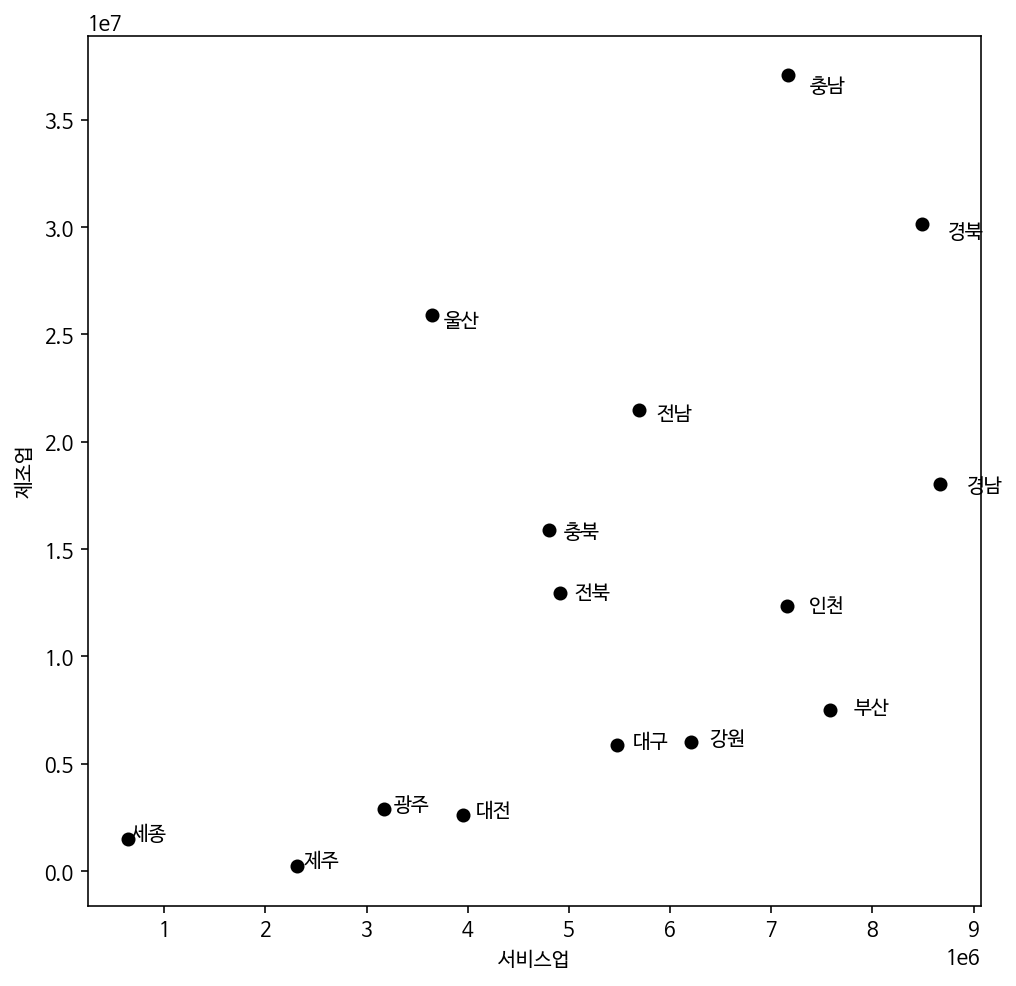

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(power['서비스업'], power['제조업'],c='k',marker='o')
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])

In [23]:
power.head()

,주거용,공공용,서비스업,업무용합계,농림어업,광업,제조업,식료품제조,"섬유,의류","목재,나무","펄프,종이","출판,인쇄","석유,화확","의료,광학",요업,1차금속,조립금속,기타기계,사무기기,전기기기,"영상,음향",자동차,기타운송,가구및기타,재생재료,산업용합계
구분,,,,,,,,,,,,,,,,,,,,,,,,,,
강원,1940933,1400421,6203749,7604170,607139,398287,6002286,546621,13027,19147,24382,7727,175323,84397,3695776,1038913,39477,35063,2019,38062,43986,113448,108629,12872,3418,7007712
경기,16587710,5533662,33434551,38968213,2371347,317263,56603327,2544420,2109963,529274,1917458,731348,6881775,1336390,1728379,2020196,2302355,3613798,317244,1040171,24519644,2977165,67594,1833112,133041,59291937
경남,4260988,1427560,8667737,10095297,2141813,95989,18053778,932743,346974,60160,817685,28486,1865583,178498,429920,3809547,1699879,1902913,8070,924235,534196,2156059,2048646,262523,47662,20291580
경북,3302463,1578115,8487402,10065517,1747462,224568,30115601,566071,3780171,72680,361772,44402,3653665,217771,1269917,10874970,933178,782570,14468,750786,4174971,2356890,123935,60280,77104,32087631
광주,1954876,565527,3174973,3740500,74608,2898,2910768,161072,295922,6782,41827,22038,391151,27221,20728,75702,156396,198847,5967,236622,723764,512148,5140,13392,16049,2988274


- 위는 두개의 전기사요량을 기준으로 산포도를 그린 것
- 이를 두개의 PCA 성분으로 산포도를 그려보시오
- 주의 사항: 입력 컬럼 중 중간합계(산업용, 업무용합계) 도 삭제 후 PCA 적용
- 주의 사항: 스케일링 해야 함(표준 스케일링 > min-max)


In [24]:
sca = StandardScaler()
# power.head()
power_pca = power.drop(['업무용합계', '산업용합계'], axis=1)
power_pca.head()

power_pca_scaled = pd.DataFrame(sca.fit_transform(power_pca), columns=power_pca.columns)
power_pca_scaled.head()

pca = PCA(n_components=2)
power_pca_scaled_pca2 = pca.fit_transform(power_pca_scaled)
power_pca_scaled_pca2.shape
power_pca_scaled_pca2.shape

(17, 2)

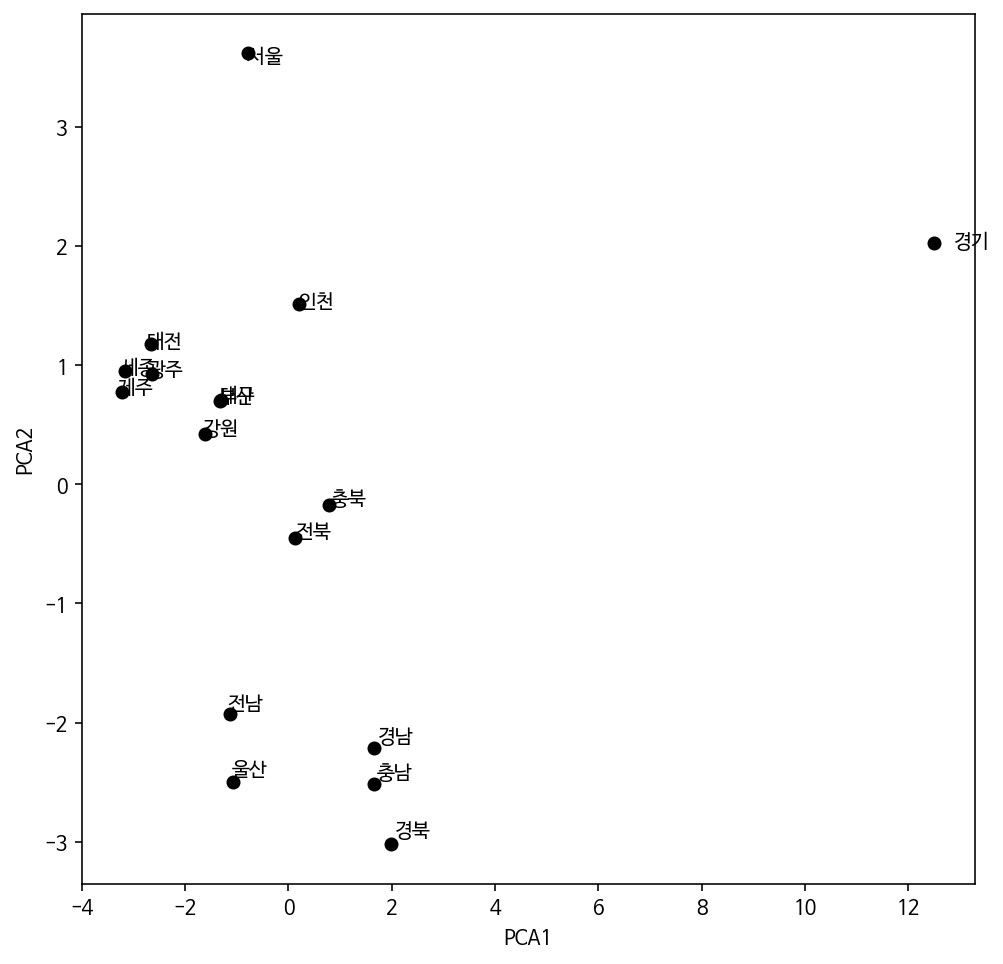

In [25]:
plt.figure(figsize=(8,8))
plt.scatter(power_pca_scaled_pca2[:,0], power_pca_scaled_pca2[:,1],c='k',marker='o')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

for n in range(power_pca.shape[0]):
    plt.text(power_pca_scaled_pca2[n,0]*1.03, power_pca_scaled_pca2[n,1]*0.98, power_pca.index[n])

In [49]:
    power_pca.index

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전남', '전북', '제주', '충남', '충북'],
      dtype='object', name='구분')

# 거리기반 클러스터링

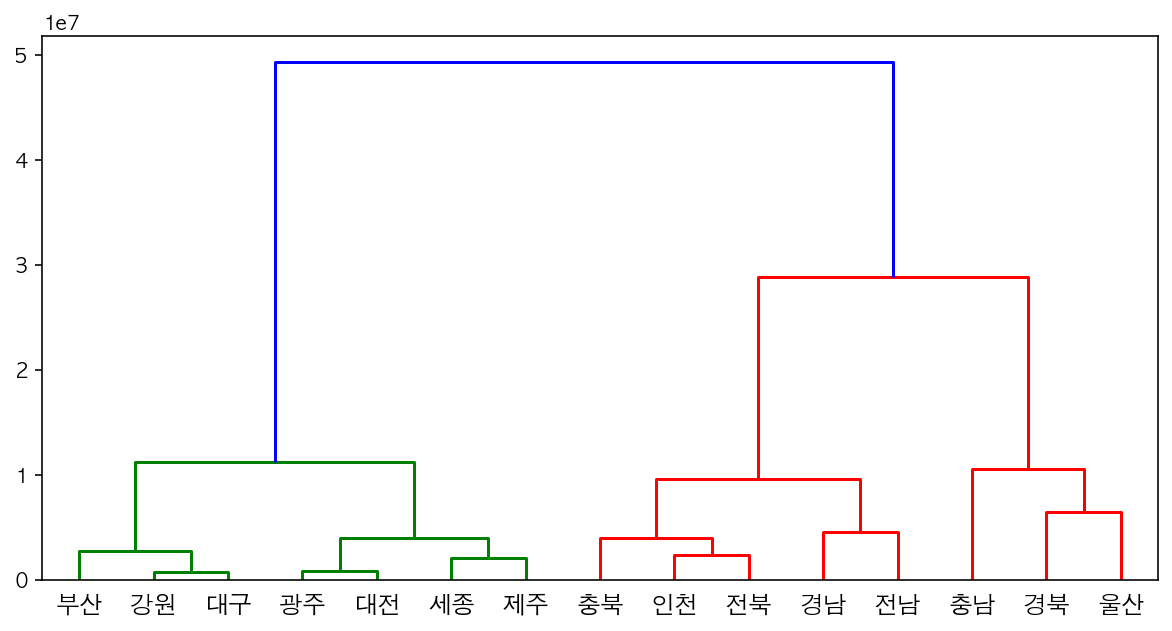

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
link_dist = linkage(power, metric='euclidean', method='ward')  
_= dendrogram(link_dist, labels=power.index.tolist())
# plt.show()

In [ ]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters=3) # (1) 모델 생성
k.fit(power) # (2) 모델 학습
k.labels_

array([2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0], dtype=int32)

In [ ]:
power['클러스터'] = k.labels_
power.head(10)

,서비스업,제조업,클러스터
구분,,,
강원,6203749,6002286,2
경남,8667737,18053778,0
경북,8487402,30115601,1
광주,3174973,2910768,2
대구,5470438,5862633,2
대전,3955921,2608343,2
부산,7582169,7512588,2
세종,645424,1502922,2
울산,3649386,25883132,1


In [ ]:
power.drop('클러스터', axis = 1, inplace=True) ; power.head()

,서비스업,제조업
구분,,
강원,6203749,6002286
경남,8667737,18053778
경북,8487402,30115601
광주,3174973,2910768
대구,5470438,5862633


In [ ]:
centers = k.cluster_centers_ ; centers

array([[ 6245553.6       , 16144968.6       ],
       [ 6433742.33333333, 31018896.        ],
       [ 4191629.42857143,  3805868.14285714]])

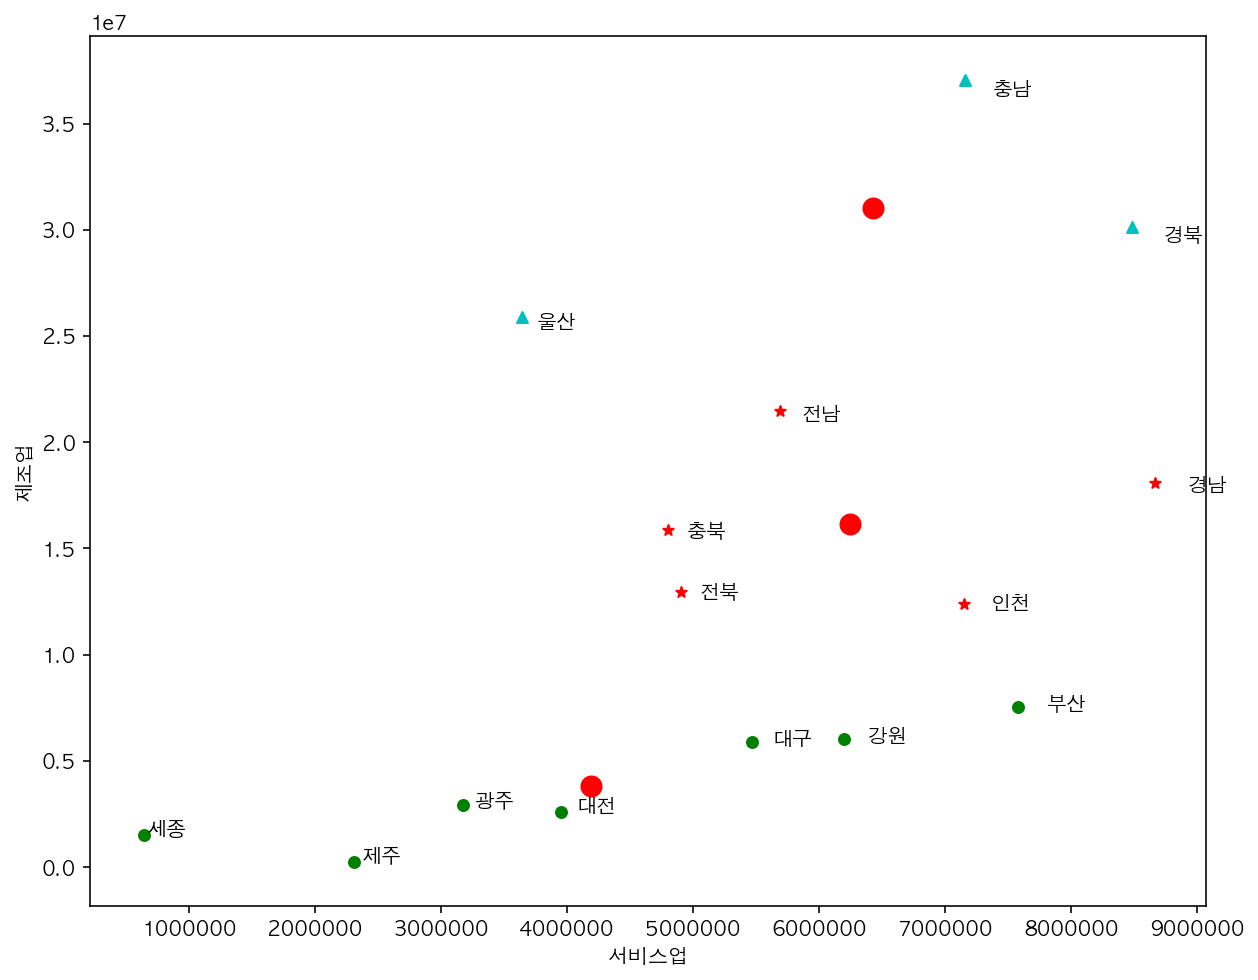

In [ ]:
my_markers=['*','^', 'o','^','.',',','1','2']
my_color =['r','c','g','b','g','k','r','y']

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')
for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=30)
    plt.text(power['서비스업'][n]*1.03, power['제조업'][n]*0.98, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 100)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
power[['서비스업', '제조업']] = scaler.fit_transform(power[['서비스업', '제조업']])
power[:10]

,서비스업,제조업
구분,,
강원,0.393992,-0.676282
경남,1.498349,0.431200
경북,1.417523,1.539632
광주,-0.963503,-0.960380
대구,0.065323,-0.689116
대전,-0.613482,-0.988171
부산,1.011798,-0.537491
세종,-2.097244,-1.089755
울산,-0.750871,1.150686


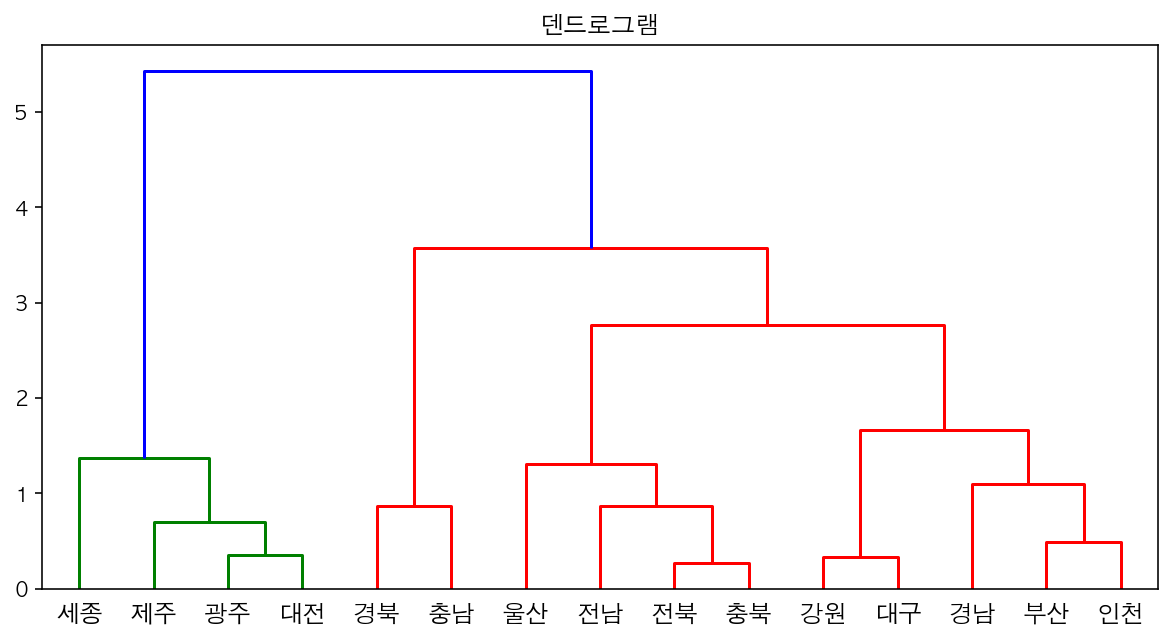

In [ ]:
Z = linkage(power, metric='euclidean', method='ward') 
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
_=dendrogram(Z, labels=power.index.tolist())

In [ ]:
k = KMeans(n_clusters= 4).fit(power)
centers = k.cluster_centers_

<Figure size 432x288 with 0 Axes>

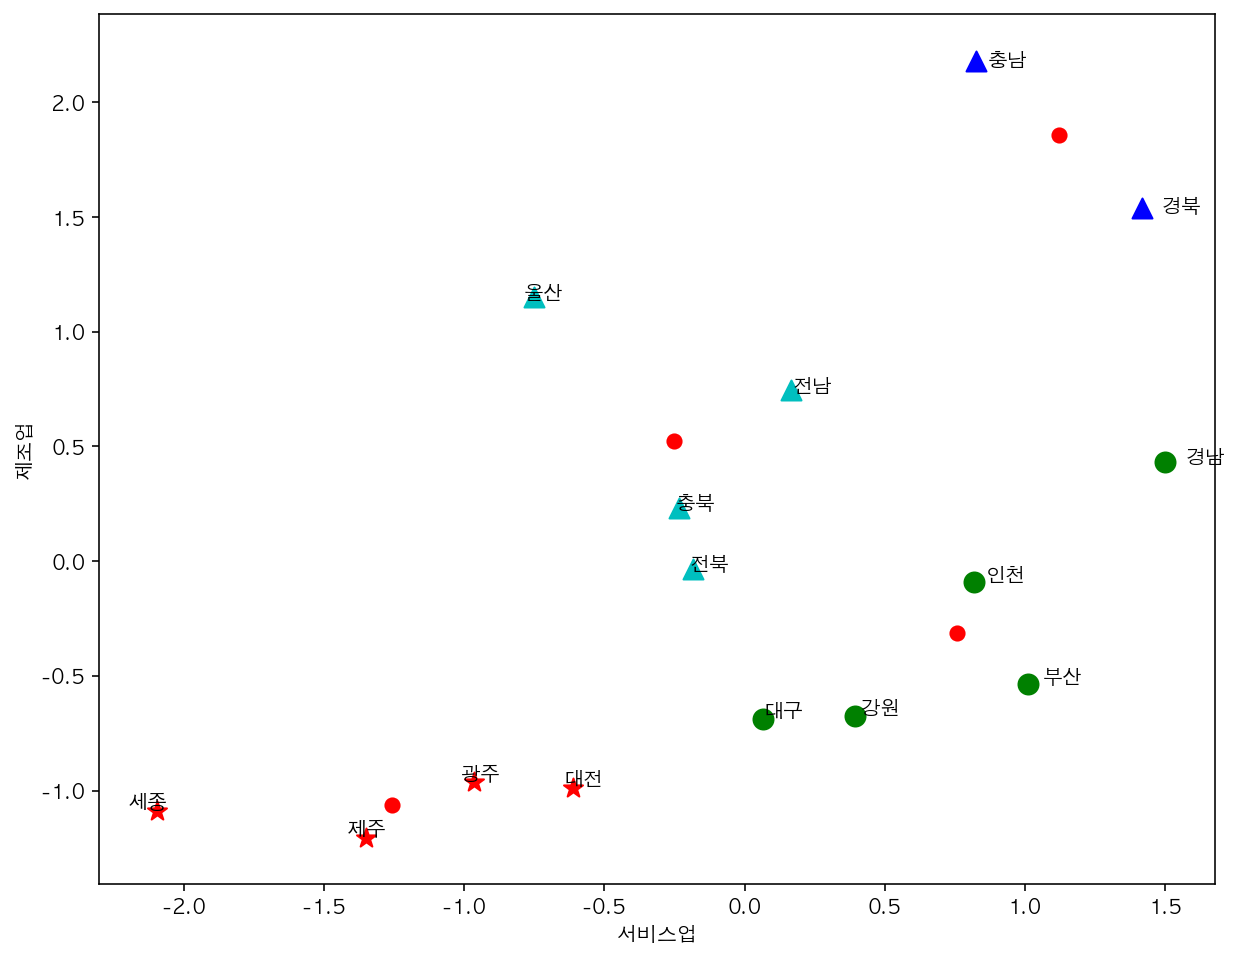

In [ ]:
plt.clf()
plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(power.shape[0]):
    label = k.labels_[n]
    plt.scatter(power['서비스업'][n], power['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power['서비스업'][n]*1.05, power['제조업'][n]*0.99, power.index[n])
    
for i in range(k.n_clusters):
    plt.scatter(centers[i][0], centers[i][1], c = 'r', s= 50)

In [ ]:
## 모든 특성 고려

In [ ]:
power2 = power_data.set_index('구분')
power2.drop(['업무용합계', '산업용합계', '합계'], axis=1, 
           inplace=True, errors='ignore')
power2.drop(['합계','개성','경기','서울'], inplace=True,errors='ignore')

In [ ]:
power2[:3].T

구분,강원,경남,경북
주거용,1940933,4260988,3302463
공공용,1400421,1427560,1578115
서비스업,6203749,8667737,8487402
농림어업,607139,2141813,1747462
광업,398287,95989,224568
제조업,6002286,18053778,30115601
식료품제조,546621,932743,566071
"섬유,의류",13027,346974,3780171
"목재,나무",19147,60160,72680
"펄프,종이",24382,817685,361772


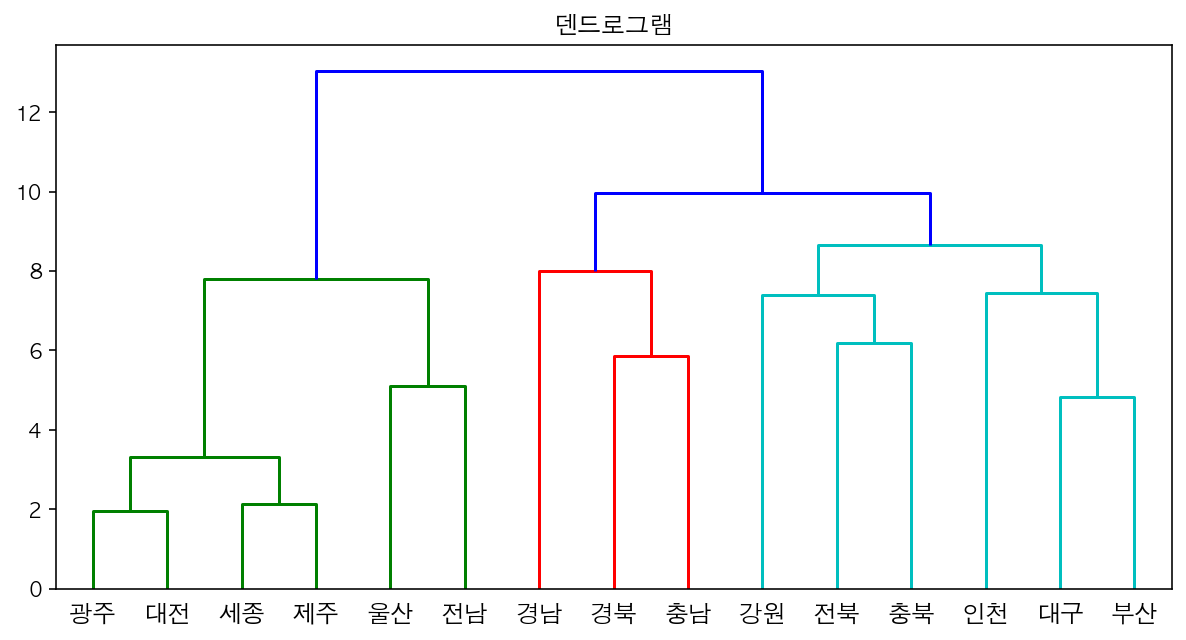

In [ ]:
power3 = pd.DataFrame(scaler.fit_transform(power2), columns=power2.columns,
                      index=power2.index)

Z = linkage(power3, metric='euclidean', method='ward') 
# 유클리드 거리를 이용해 Linkage Matrix를 생성
plt.figure(figsize=(10, 5))
plt.title('덴드로그램')
_=dendrogram(Z, labels=power3.index.tolist())

15


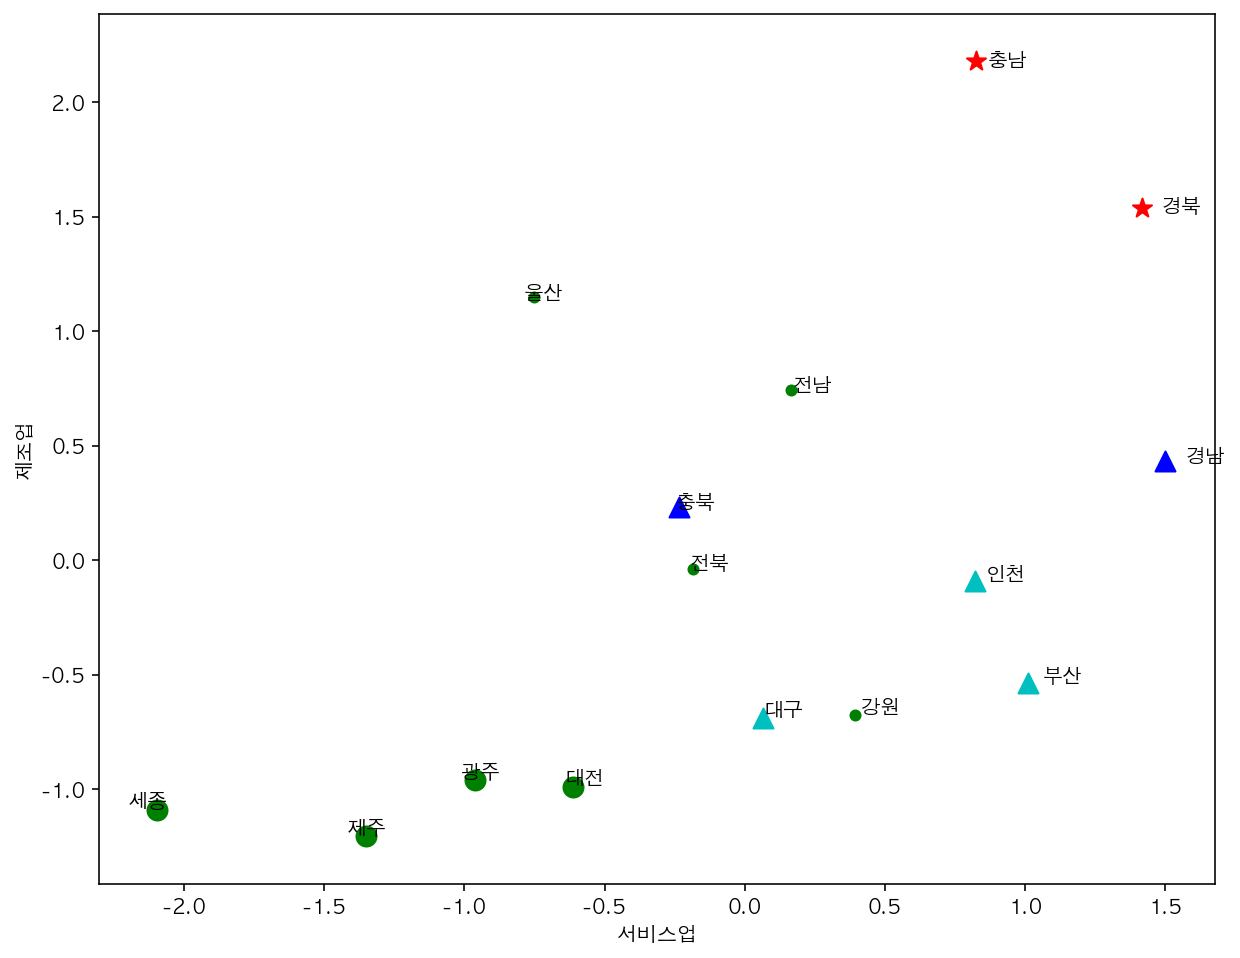

In [ ]:
k = KMeans(n_clusters=5).fit(power3)
n_samples = power3.shape[0]
print(n_samples)

plt.figure(figsize=(10, 8))
plt.xlabel('서비스업')
plt.ylabel('제조업')

for n in range(n_samples):
    label = k.labels_[n]
    plt.scatter(power3['서비스업'][n], power3['제조업'][n], c=my_color[label], marker=my_markers[label], s=100)
    plt.text(power3['서비스업'][n]*1.05, power3['제조업'][n]*0.99, power3.index[n])
    

# 밀도기반 클러스터링

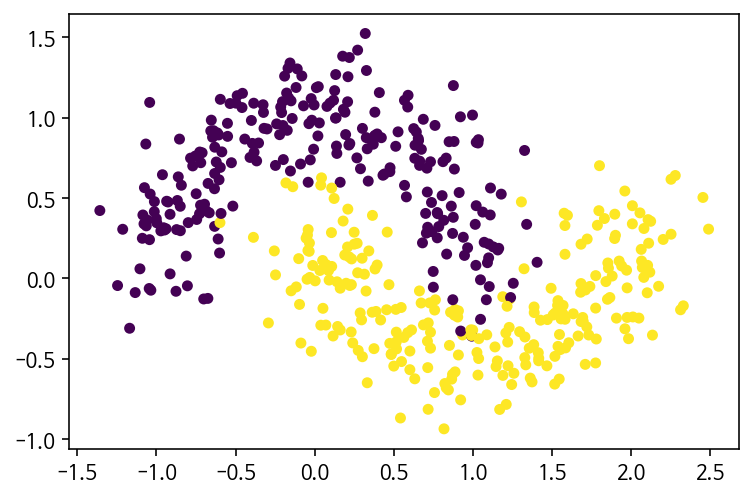

In [26]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
X, y = make_moons(n_samples=500, noise=0.2, random_state=11)
plt.scatter(X[:,0], X[:,1], c=y, s=20)
plt.show()

In [ ]:
X[:10], y[:10]

NameError: name 'X' is not defined

In [27]:
kmeans = KMeans(n_clusters=2) # (1) 모델 생성, 정의, 생성자
kmeans.fit(X) # (2) 학습

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
kmeans.labels_

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [29]:
kmeans.predict([[1.5, 1],[-.5, 0.5],[0.5,0.5]]) # 다른 값 시도

array([1, 0, 0], dtype=int32)

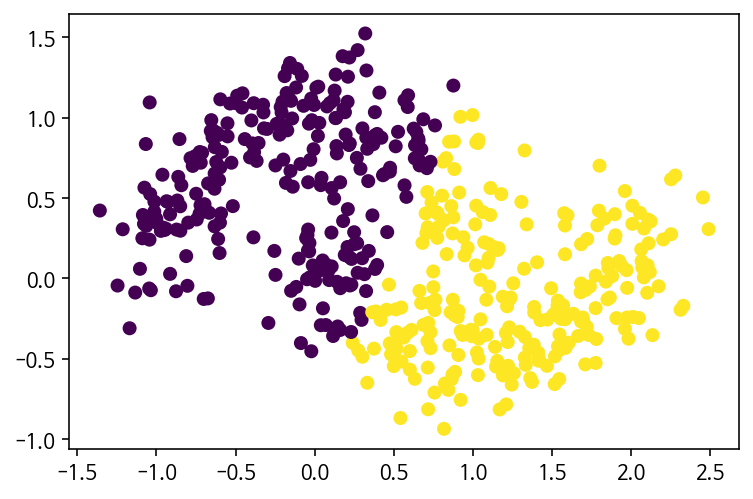

In [30]:
label_pred = kmeans.predict(X) # (3) 모델 사용 (클러스터 예측)
# label_pred = kmeans.fit_predict(X) # (2,3) 학습 및 모델 사용 (클러스터 예측)
plt.scatter(X[:,0], X[:,1],c=label_pred)

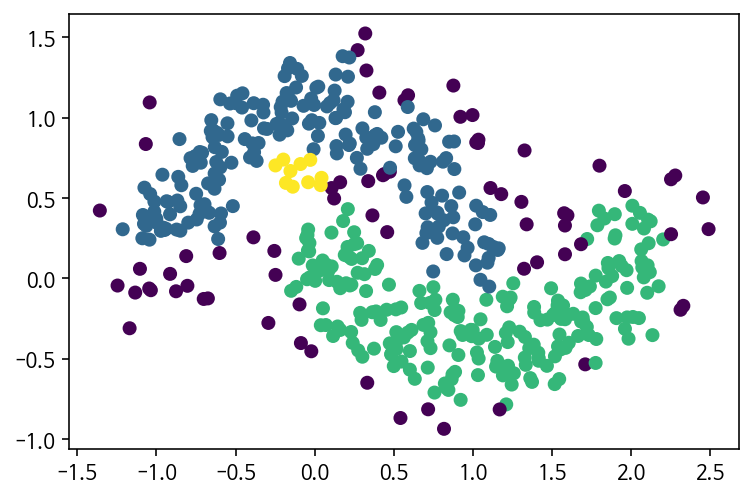

In [36]:
dbscan = DBSCAN(eps=0.15, min_samples=7, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

In [ ]:
predict[:10]

array([ 2,  0,  0,  0,  1,  1,  0,  0,  1, -1,  1, -1,  1,  1,  1, -1,  0,
        1,  1,  0,  0,  0,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1, -1,  1,
        0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  1,  0,  1,  0,  1,  2,
        1,  0,  1,  1,  1, -1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  0, -1, -1,  1,  1,  0,  1,  0,  0,  0,  1,
        0,  1,  0,  0,  1,  0,  1,  1,  1,  1,  0, -1,  0, -1,  1,  1,  1,
        0,  1,  0,  1,  1,  0,  0,  0,  1,  1,  0,  1, -1,  1,  1,  1,  1,
        2,  0,  0,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,
        0,  0,  0,  1,  1,  1,  0,  1,  1, -1,  1,  1,  1,  0,  0, -1,  1,
        0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  1,
        0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  0,  1,  1,  0,  0,  1,
        0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  0,  1,  1,  0, -1,  1,  1,
        0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  0,  0, -1,  1,  0, -1,  0,
       -1,  1,  0,  0,  1

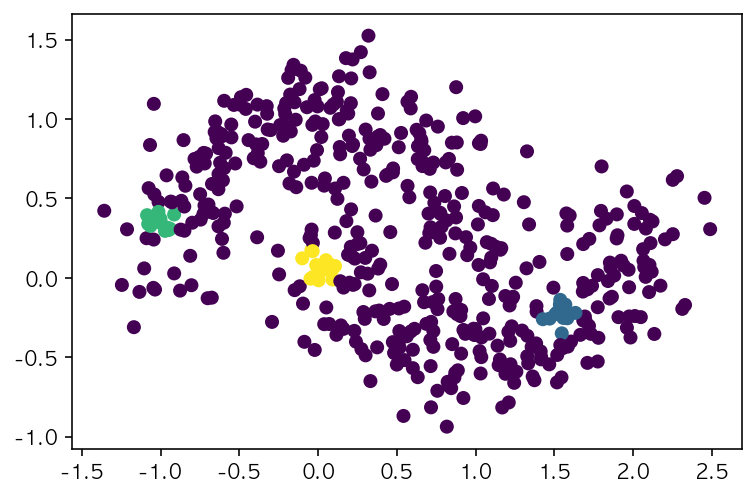

In [ ]:
dbscan = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

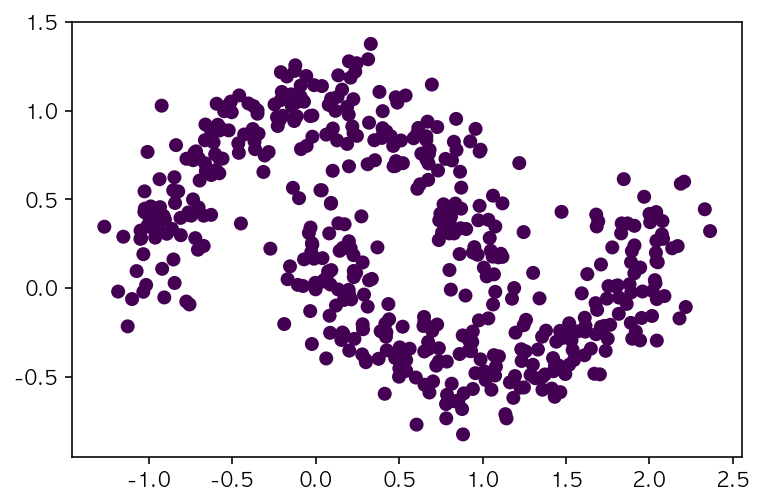

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

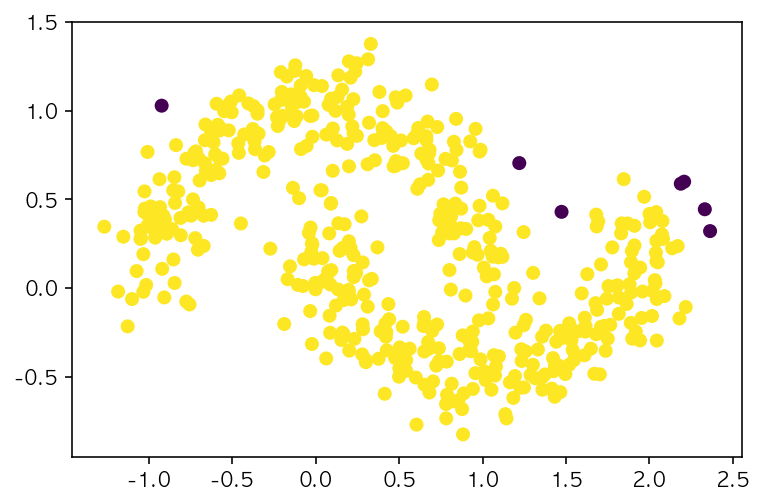

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=6, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

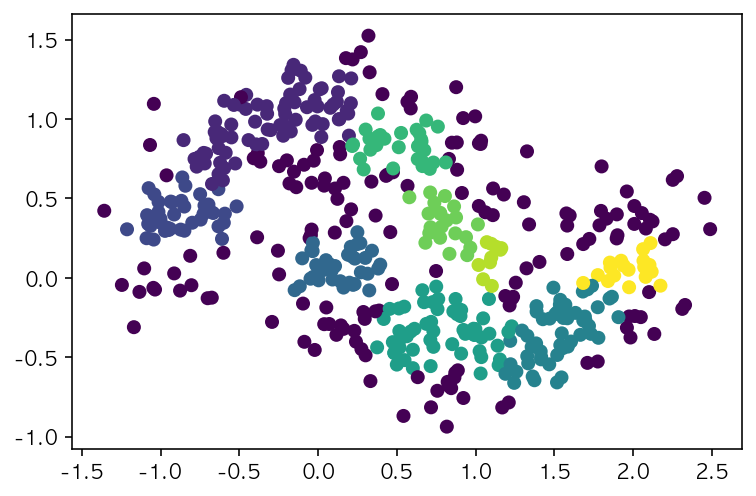

In [ ]:
dbscan = DBSCAN(eps=0.16, min_samples=12, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)